In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from PIL import Image

2024-02-02 22:41:18.905004: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Avoid Out of Memory Error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

gpus

2024-02-02 22:41:21.317062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1013] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 22:41:21.324955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1013] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 22:41:21.325129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1013] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/s

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2. Preprocess Data

2.1 Augment Images

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range=180,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    fill_mode='reflect',
)

In [4]:
# https://github.com/bnsreenu/python_for_microscopists/blob/master/127_data_augmentation_using_keras.py

for image_class in os.listdir('BM_cytomorphology_data_augmented'):
    dataset = []
    image_class_path = os.path.join('BM_cytomorphology_data_augmented', image_class)
    
    _, _, files = next(os.walk(image_class_path))
    number_files = len(files)

    images_needed = 25000 - number_files
        
    if images_needed > 0:
        print('Augmenting images for: ' + image_class)
        images = os.listdir(image_class_path)
        for i, image_name in enumerate(images):
            if not image_name.startswith('aug'):
                image_path = os.path.join(image_class_path, image_name)
                image = io.imread(image_path)
                image = Image.fromarray(image, 'RGB')
                dataset.append(np.array(image))
        
        x = np.array(dataset)

        for batch in train_datagen.flow(x, batch_size=64,  
                                        save_to_dir=image_class_path, 
                                        save_prefix='aug', 
                                        save_format='jpg'):
            
            _, _, files = next(os.walk(image_class_path))
            number_files = len(files)
            if (number_files >= 25000):
                print('Finished augmenting images for: ' + image_class)
                break

2.1.1 Verify Number of Images

In [5]:
for image_class in os.listdir('BM_cytomorphology_data_augmented'):
    image_class_path = os.path.join('BM_cytomorphology_data_augmented', image_class)
    
    _, _, files = next(os.walk(image_class_path))
    number_files = len(files)
    
    print(f"{image_class}: {number_files} images")

EBO: 25006 images
ART: 25057 images
BLA: 25045 images
NGB: 25018 images
NIF: 25002 images
MMZ: 25044 images
HAC: 25061 images
FGC: 25024 images
OTH: 25027 images
ABE: 25001 images
PMO: 25017 images
KSC: 25018 images
MON: 25023 images
EOS: 25046 images
MYB: 25039 images
PLM: 25011 images
LYI: 25003 images
LYT: 25000 images
NGS: 25053 images
PEB: 25004 images
BAS: 25000 images


2.2 Load Images

In [6]:
# Build data pipline
training_data = tf.keras.utils.image_dataset_from_directory('BM_cytomorphology_data_augmented', image_size=(250, 250))
val_data = tf.keras.utils.image_dataset_from_directory('Validation', image_size=(250, 250))
data_iterator = training_data.as_numpy_iterator()
batch = data_iterator.next()

label_to_class_mapping = {label: class_name for label, class_name in enumerate(training_data.class_names)}

label_to_class_mapping

numeric_labels = batch[1]

# Convert numeric labels to class names
class_names = [label_to_class_mapping[label] for label in numeric_labels]

Found 525499 files belonging to 21 classes.


2024-02-02 22:41:54.729405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1013] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 22:41:54.729872: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1013] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 22:41:54.730242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1013] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/s

Found 23973 files belonging to 21 classes.


2024-02-02 22:41:56.014955: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [525499]
	 [[{{node Placeholder/_4}}]]
2024-02-02 22:41:56.015426: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [525499]
	 [[{{node Placeholder/_4}}]]


2.3 Scale Images

In [7]:
#Scale data from 0-255 to 0-1
training_data = training_data.map(lambda image,label: (image/255, label))
val_data = val_data.map(lambda image,label: (image/255, label))
scaled_iterator = training_data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()
# data.as_numpy_iterator().next()[0].max()

2024-02-02 22:41:56.266935: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [525499]
	 [[{{node Placeholder/_4}}]]
2024-02-02 22:41:56.267233: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [525499]
	 [[{{node Placeholder/_0}}]]


1.0

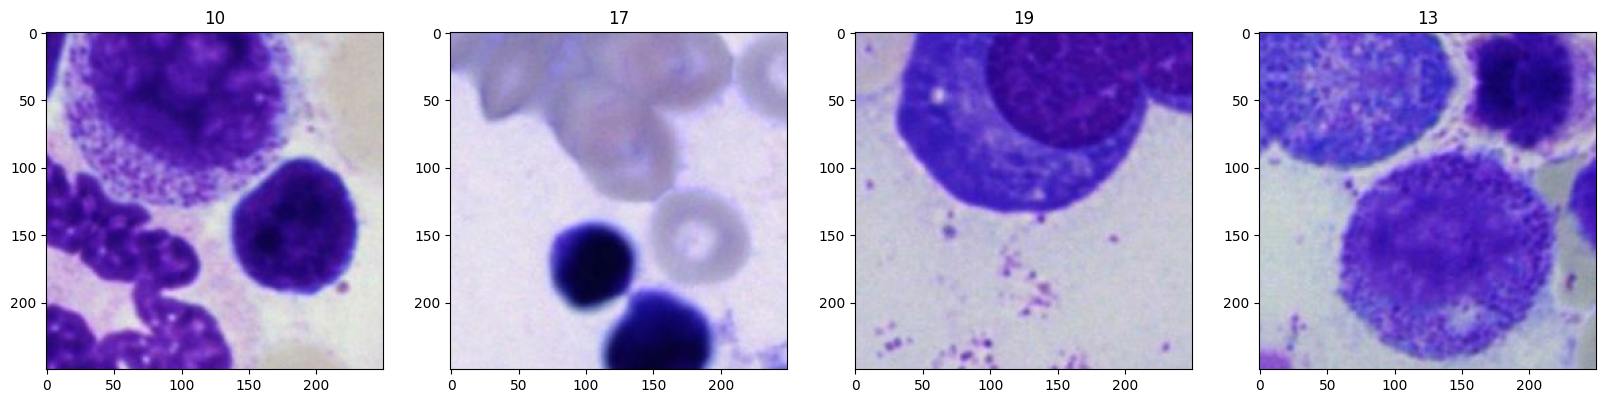

In [8]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

3. Deep Model

3.1 Build Deep Learning Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation

model = Sequential()
# 16 filters, 3x3 size, stride of 1, 
#0
model.add(Conv2D(8, (3, 3), 1, input_shape=(250, 250, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#1
model.add(Conv2D(8, (3, 3), 1, padding='same'))  # Adjusted the kernel size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))

#2
model.add(Conv2D(16, (3, 3), 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#3
model.add(Conv2D(16, (3, 3), 1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))

#4
model.add(Conv2D(32, (3, 3), 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5
model.add(Conv2D(32, (3, 3), 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))

#6
model.add(Conv2D(64, (3, 3), 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#7
model.add(Conv2D(64, (3, 3), 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3)))

model.add(Flatten())

# Fully connected layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(21))
model.add(Activation('softmax'))

In [10]:
# Uses adam optimiser
from tensorflow.keras.optimizers import Adam

# initial_learning_rate = 0.001
# optimizer = Adam(learning_rate=initial_learning_rate)

model.compile('adam', loss = tf.losses.SparseCategoricalCrossentropy(),metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 8)       584       
                                                                 
 activation_1 (Activation)   (None, 250, 250, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 8)        0         
 )                                                      

3.2 Training

In [12]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [14]:
import time

t0 = time.time()
hist = model.fit(training_data, epochs = 50, validation_data = val_data, callbacks = [tensorboard_callback], verbose = 2)
t1 = time.time()-t0

print('Training time: ', t1)

Epoch 1/50


2024-02-02 22:42:42.151388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2024-02-02 22:42:43.217874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:655] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-02-02 22:42:43.319583: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55c0fdad2890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-02 22:42:43.319612: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-02-02 22:42:43.378558: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-02 22:42:43.968571: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

16422/16422 - 443s - loss: 1.1533 - accuracy: 0.6282 - val_loss: 1.0558 - val_accuracy: 0.6542 - 443s/epoch - 27ms/step
Epoch 2/50
16422/16422 - 433s - loss: 0.8314 - accuracy: 0.7259 - val_loss: 0.8272 - val_accuracy: 0.7327 - 433s/epoch - 26ms/step
Epoch 3/50
16422/16422 - 425s - loss: 0.7498 - accuracy: 0.7508 - val_loss: 0.7604 - val_accuracy: 0.7523 - 425s/epoch - 26ms/step
Epoch 4/50
16422/16422 - 430s - loss: 0.6998 - accuracy: 0.7665 - val_loss: 0.7467 - val_accuracy: 0.7528 - 430s/epoch - 26ms/step
Epoch 5/50
16422/16422 - 426s - loss: 0.6657 - accuracy: 0.7776 - val_loss: 0.7214 - val_accuracy: 0.7649 - 426s/epoch - 26ms/step
Epoch 6/50
16422/16422 - 430s - loss: 0.6417 - accuracy: 0.7846 - val_loss: 0.7181 - val_accuracy: 0.7650 - 430s/epoch - 26ms/step
Epoch 7/50
16422/16422 - 431s - loss: 0.6210 - accuracy: 0.7922 - val_loss: 0.7320 - val_accuracy: 0.7619 - 431s/epoch - 26ms/step
Epoch 8/50
16422/16422 - 432s - loss: 0.6052 - accuracy: 0.7963 - val_loss: 0.6724 - val_accur

3.3 Plot Performance

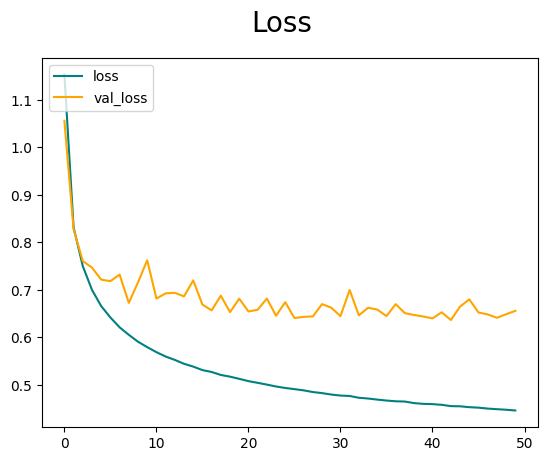

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

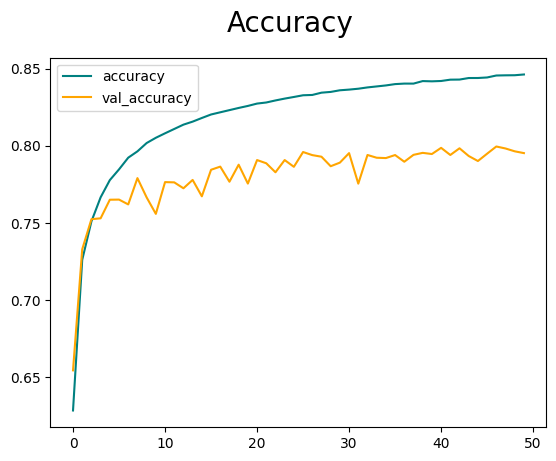

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [17]:
import pickle

folder = 'pickle'
inner_foler = 'augmented_model'

with open(os.path.join(folder, inner_foler, 'model_pickle'), 'wb') as f:
    pickle.dump(model, f)

In [18]:
with open(os.path.join(folder, inner_foler, 'history_pickle'), 'wb') as f:
    pickle.dump(hist.history, f)

4. Evaluate Performance

4.1 Evaluate

In [19]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [20]:
precision_per_class = [tf.keras.metrics.Precision(class_id=i) for i in range(21)]
recall_per_class = [tf.keras.metrics.Recall(class_id=i) for i in range(21)]
accuracy_per_class = [tf.keras.metrics.BinaryAccuracy(threshold=0.0) for _ in range(21)]

In [21]:
y_true = []
y_pred = []

# batch_size = 16
# print("test")

for batch in val_data.as_numpy_iterator():
    batch_size = len(batch[0])  # Assuming the first element of the batch is the input data
    print(f"Current batch size: {batch_size}")
    image, y = batch
    y_one_hot = tf.one_hot(y, 21)
    yhat = model.predict(image)
    pre.update_state(y_one_hot, yhat)
    re.update_state(y_one_hot, yhat)
    acc.update_state(y_one_hot, yhat)
    
    y_true.extend(np.argmax(y_one_hot, axis = 1))
    y_pred.extend(np.argmax(yhat, axis = 1))
    
    # Had OOM errors previously
    tf.keras.backend.clear_session()

Current batch size: 32
1/1 [==============================] - 0s 171ms/step
Current batch size: 32
1/1 [==============================] - 0s 66ms/step
Current batch size: 32
1/1 [==============================] - 0s 64ms/step
Current batch size: 32
1/1 [==============================] - 0s 72ms/step
Current batch size: 32
1/1 [==============================] - 0s 65ms/step
Current batch size: 32
1/1 [==============================] - 0s 63ms/step
Current batch size: 32
1/1 [==============================] - 0s 63ms/step
Current batch size: 32
1/1 [==============================] - 0s 64ms/step
Current batch size: 32
1/1 [==============================] - 0s 63ms/step
Current batch size: 32
1/1 [==============================] - 0s 63ms/step
Current batch size: 32
1/1 [==============================] - 0s 72ms/step
Current batch size: 32
1/1 [==============================] - 0s 65ms/step
Current batch size: 32
1/1 [==============================] - 0s 75ms/step
Current batch size: 32
1

In [22]:
from sklearn.metrics import classification_report

print("Total")
print(f'Precision{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

y_true = np.array(y_true)
y_pred = np.array(y_pred)
class_labels = [str(i) for i in range(21)]
class_names = [label_to_class_mapping[label] for label in sorted(label_to_class_mapping.keys())]

# Generate classification report with specified labels
class_report = classification_report(y_true, y_pred, labels=class_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Total
Precision0.8313405513763428, Recall:0.7656947374343872, Accuracy:0.9814453721046448
Classification Report:
               precision    recall  f1-score   support

         ABE       0.00      0.00      0.00         1
         ART       0.82      0.84      0.83      2747
         BAS       0.53      0.48      0.50        61
         BLA       0.72      0.76      0.74      1675
         EBO       0.90      0.90      0.90      3834
         EOS       0.91      0.91      0.91       822
         FGC       0.08      0.33      0.13         6
         HAC       0.41      0.51      0.46        57
         KSC       0.10      0.17      0.12         6
         LYI       0.12      0.11      0.12         9
         LYT       0.84      0.87      0.86      3673
         MMZ       0.38      0.42      0.40       427
         MON       0.61      0.61      0.61       564
         MYB       0.63      0.55      0.59       917
         NGB       0.60      0.65      0.62      1394
         NGS       0.

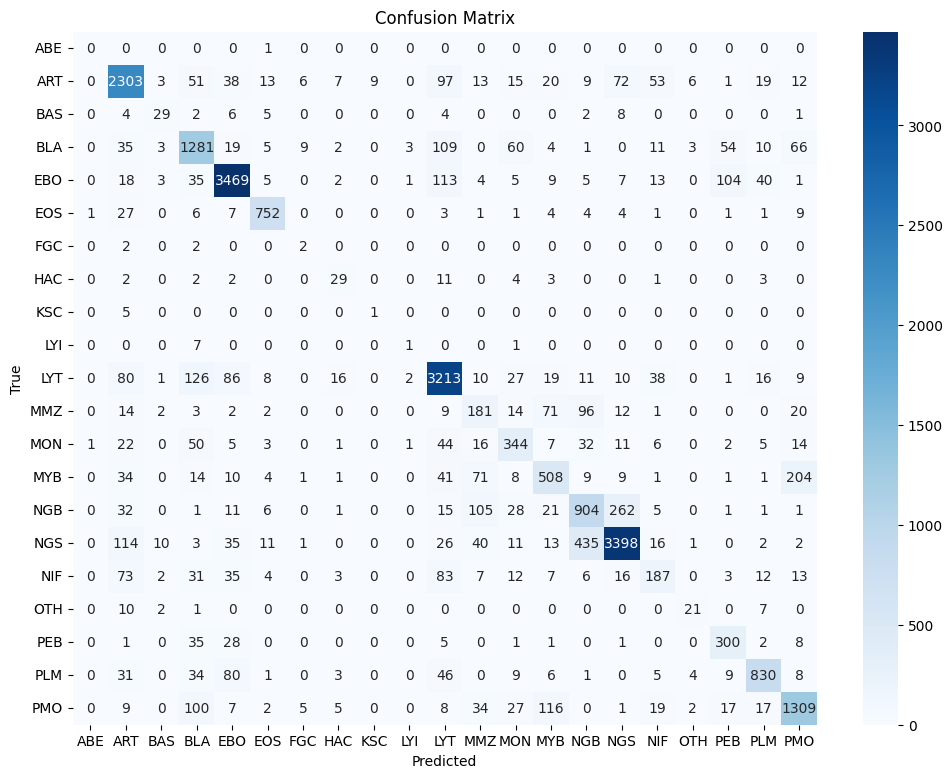

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = np.argmax(y_one_hot, axis=1)
predicted_labels = np.argmax(yhat, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred, labels = list(range(21)))
plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

confusion_data = {
    'conf_matrix': conf_matrix,
    'class_labels': class_names,
}

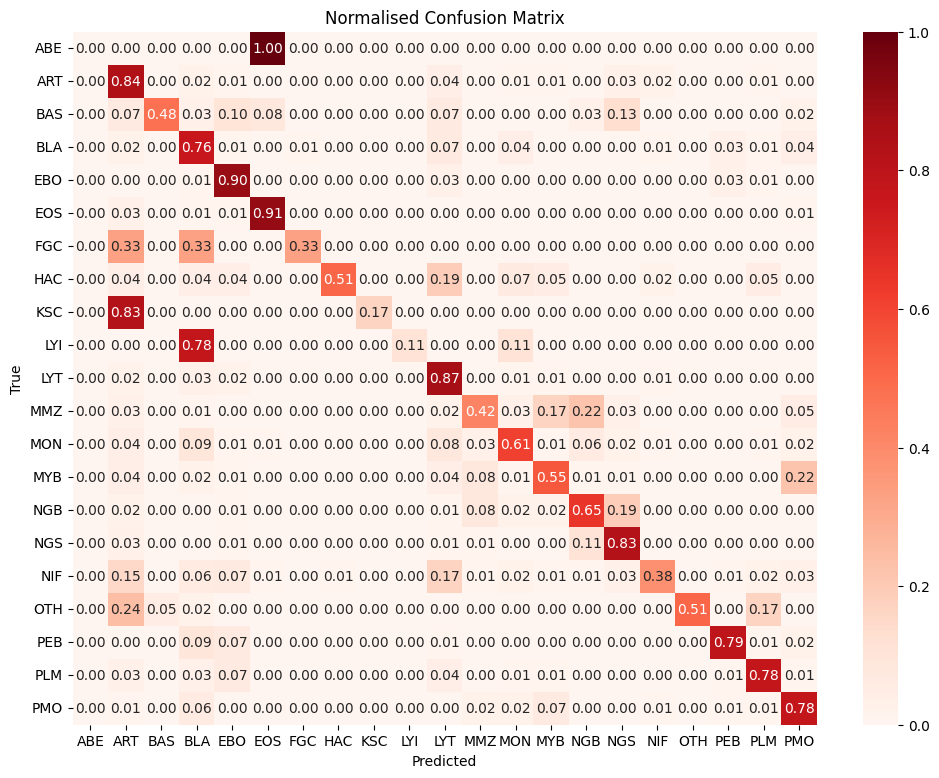

array([1.  , 0.99, 1.01, 1.  , 0.98, 0.97, 0.99, 1.01, 1.  , 1.  , 0.97,
       0.98, 1.  , 0.99, 1.  , 1.  , 0.99, 0.99, 0.99, 0.99, 0.99])

In [24]:
class_totals = np.sum(conf_matrix, axis=1)

normalised_conf_matrix = np.zeros_like(conf_matrix, dtype=float)
for i in range(len(class_totals)):
    if class_totals[i] != 0:
        normalised_conf_matrix[i, :] = np.round(conf_matrix[i, :] / class_totals[i], 2)

# # Plot the normalised confusion matrix with class names as tick labels
plt.figure(figsize=(12, 9))
sns.heatmap(normalised_conf_matrix, annot=True, fmt='.2f', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix')
plt.show()

totals = np.sum(normalised_conf_matrix, axis=1)

normalised_confusion_data = {
    'normalised_conf_matrix': normalised_conf_matrix,
    'class_labels': class_names,
}

totals

5. Save model & outputs

In [25]:
with open(os.path.join(folder, inner_foler, 'classification_report'), 'wb') as f:
    pickle.dump(class_report, f)
    
with open(os.path.join(folder, inner_foler, 'confusion_data'), 'wb') as f:
    pickle.dump(confusion_data, f)
    
with open(os.path.join(folder, inner_foler, 'normalised_confusion_data'), 'wb') as f:
    pickle.dump(normalised_confusion_data, f)